# Part I - (Dataset Exploration Title)
## by EDOKA CHISOM

## Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio and many others.

This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit) explains the variables in the data set.
We will not be exploring all of the variables, we will focus on just the very important ones.Focusing our exploration on about 10-15 of them.





## Preliminary Wrangling

This document explores a dataset containing loans given by **Prosper company** a finance loan company for approximately 110,000 loans

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the dataset into pandas
loans = pd.read_csv("prosperLoanData.csv")
loans.sample(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
39482,14043429337539556B77387,384380,2008-08-18 08:49:34.507000000,C,36,Completed,2011-05-20 00:00:00,0.23250,0.2100,0.2000,...,-42.18,0.00,0.0,0.0,0.0,1.0,0,0,0.0,94
82240,1D1835854987191522AE7DF,861393,2013-08-06 08:01:13.460000000,NaN,36,Current,NaN,0.29537,0.2566,0.2466,...,-24.00,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
97932,6F3F3559622171567941D97,650109,2012-10-05 12:18:55.110000000,NaN,60,Past Due (61-90 days),NaN,0.14494,0.1223,0.1123,...,-90.97,-84.53,0.0,0.0,0.0,1.0,0,0,0.0,45


In [3]:
print(loans.shape)

(113937, 81)


### What is the structure of your dataset?

> There are 110,000+ loans with 81 features which I would be scaling down to 23 features for easier analysis. Most of the features are numerical with a few categorical ones. 

> Numerical features = [*Term, BorrowerAPR, LenderYield, ProsperRating(numeric), ProsperScore, EmploymentStatusDuration, CurrentDelinquencies, TradesNeverDelinquent (percentage), DebtToIncomeRatio, StatedMonthlyIncome, LoanCurrentDaysDelinquent, LoanMonthsSinceOrigination, LoanOriginalAmount, MonthlyLoanPayment, PercentFunded, Recommendations, Investors*]


- **Term**: The length of the loan expressed in months.


- **BorrowerAPR**: The Borrower's Annual Percentage Rate (APR) for the loan. It is the actual amount a borrower pays including services fee in terms of percentages



- **ProsperRating(numeric)**: The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009. HR<E<D<C<B<A<AA


- **ProsperScore**: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.




- **EmploymentStatusDuration**: The length in months of the employment status at the time the listing was created.



- **CurrentDelinquencies**: Number of accounts delinquent at the time the credit profile was pulled.



- **TradesNeverDelinquent (percentage)**: Number of trades that have never been delinquent at the time the credit profile was pulled.



- **DebtToIncomeRatio**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).


- **StatedMonthlyIncome**: The monthly income the borrower stated at the time the listing was created. 




- **LoanOriginalAmount**: The origination amount of the loan.


- **MonthlyLoanPayment**: The scheduled monthly loan payment. 








> Categorical features = [*LoanStatus, ProsperRating, ListingCategory, EmploymentStatus*]

- **LoanStatus**: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
    1. Completed -  A loan that has been paid in full
    2. Current -  A loan that is been owned as at that time
    3. Cancelled- Loans that are no longer required to be paid
    4. Chargedoff - Loans that have been written off as a loss
    5. Defaulted - Loan as to which all payments of principal and interest then due have been paid, except for the most recent                    payment then due of principal and interest.
    6. FinalPaymentInProgress - Final loan payment before a loan is completed
    7. PastDue - Loans payment that has passed their due date


- **ProsperRating(Alpha)**: The Prosper Rating assigned at the time the listing was created between AA - HR.
    HR<E<D<C<B<A<AA



- **EmploymentStatus**: The employment status of the borrower at the time they posted the listing.
    
 

### What is/are the main feature(s) of interest in your dataset?

> What factors affect a loan’s outcome status?


> What affects the borrower’s APR or interest rate?
    

> Are there differences between
loans depending on how large the
original loan amount was?




### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Employment History that is EmploymentStatusDuration,
> DebtToIncomeRatio,
> ProsperCreditScore,
> Loan Term and amount,
> IsBrrowerHomeOwner,
> StatedIncome and if IncomeVerifiable

### Quality Issues
1. Too many redundant columns
2. Too many LoanStatus categories
3. Convert columns (ProsperRating(Alpha) to categorical data type


In [4]:
# make a copy of the original dataset
loan = loans.copy()
loan.to_csv("loan.csv",index=False)

### Issue #1: Drop some columns

In [5]:
# remove redundant and uninteresting columns
loan = loan.drop(columns=['ListingKey','ListingNumber','BorrowerRate',"CreditGrade",
'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',"ClosedDate",
'GroupKey', 'FirstRecordedCreditLine','FirstRecordedCreditLine','Occupation',
'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months','AvailableBankcardCredit',
'TotalInquiries','OpenCreditLines','DelinquenciesLast7Years','PublicRecordsLast10Years','LoanCurrentDaysDelinquent',
'PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization','LoanKey','TotalProsperLoans',
'TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','PercentFunded',
'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','Investors',
'ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber','LoanNumber','LoanOriginationDate','AmountDelinquent',
'LoanOriginationQuarter','MemberKey','LP_CustomerPayments','CreditScoreRangeLower', 'CreditScoreRangeUpper','Recommendations',
'LP_CustomerPrincipalPayments','LP_InterestandFees','LP_ServiceFees','DateCreditPulled','TotalTrades','LoanMonthsSinceOrigination',
'LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss','BorrowerState','ListingCreationDate',"IncomeRange",
'LP_NonPrincipalRecoverypayments','InvestmentFromFriendsCount','InvestmentFromFriendsAmount','TradesOpenedLast6Months'])

In [6]:
loan.shape

(113937, 19)

In [7]:
loan.columns

Index(['Term', 'LoanStatus', 'BorrowerAPR', 'LenderYield',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'CurrentDelinquencies', 'TradesNeverDelinquent (percentage)',
       'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'LoanOriginalAmount', 'MonthlyLoanPayment'],
      dtype='object')

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Term                                113937 non-null  int64  
 1   LoanStatus                          113937 non-null  object 
 2   BorrowerAPR                         113912 non-null  float64
 3   LenderYield                         113937 non-null  float64
 4   ProsperRating (numeric)             84853 non-null   float64
 5   ProsperRating (Alpha)               84853 non-null   object 
 6   ProsperScore                        84853 non-null   float64
 7   ListingCategory (numeric)           113937 non-null  int64  
 8   EmploymentStatus                    111682 non-null  object 
 9   EmploymentStatusDuration            106312 non-null  float64
 10  IsBorrowerHomeowner                 113937 non-null  bool   
 11  CurrentlyInGroup          

In [9]:
loan.describe()

,Term,BorrowerAPR,LenderYield,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CurrentDelinquencies,TradesNeverDelinquent (percentage),DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,113937.000000,113912.000000,113937.000000,84853.000000,84853.000000,113937.000000,106312.000000,113240.000000,106393.000000,105383.000000,1.139370e+05,113937.00000,113937.000000
mean,40.830248,0.218828,0.182701,4.072243,5.950067,2.774209,96.071582,0.592052,0.885897,0.275947,5.608026e+03,8337.01385,272.475783
std,10.436212,0.080364,0.074516,1.673227,2.376501,3.996797,94.480605,1.978707,0.148179,0.551759,7.478497e+03,6245.80058,192.697812
min,12.000000,0.006530,-0.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.00000,0.000000
25%,36.000000,0.156290,0.124200,3.000000,4.000000,1.000000,26.000000,0.000000,0.820000,0.140000,3.200333e+03,4000.00000,131.620000
50%,36.000000,0.209760,0.173000,4.000000,6.000000,1.000000,67.000000,0.000000,0.940000,0.220000,4.666667e+03,6500.00000,217.740000
75%,36.000000,0.283810,0.240000,5.000000,8.000000,3.000000,137.000000,0.000000,1.000000,0.320000,6.825000e+03,12000.00000,371.580000
max,60.000000,0.512290,0.492500,7.000000,11.000000,20.000000,755.000000,83.000000,1.000000,10.010000,1.750003e+06,35000.00000,2251.510000


## Univariate Exploration
I will start looking at the distribution with the main variable of interest(**LoanStatus**).

In [10]:
loan['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [11]:
loan['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### Issue #2: #Too many LoanStatus categories

### Define: Reduce the loan categories to 
* 'Completed', 'Current', 'Chargedoff','Cancelled','Defaulted','FinalPaymentInProgress' and 'Past Due'*

> Completed: A loan that has been paid in full

> Current: A loan that is been owned as at that time

> Chargedoff: Loans that have been written off as a loss

> Cancelled: Loans that are no longer required to be paid

> Defaulted:  Loan as to which all payments of principal and interest then due have been paid, except for the most recent payment then due of principal and interest.

> FinalPaymentInProgress: Final loan payment before a loan is completed

> PastDue: Loans payment that has passed their due date

In [12]:
loan['LoanStatus'] = loan['LoanStatus'].replace({'Past Due (1-15 days)':'PastDue', 'Past Due (31-60 days)': 'PastDue',
                           'Past Due (61-90 days)': 'PastDue','Past Due (91-120 days)' : 'PastDue', 
                           'Past Due (16-30 days)' : 'PastDue','Past Due (>120 days)' : 'PastDue'})

In [13]:
loanstatus_count = loan['LoanStatus'].value_counts()
loanstatus_count

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
PastDue                    2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

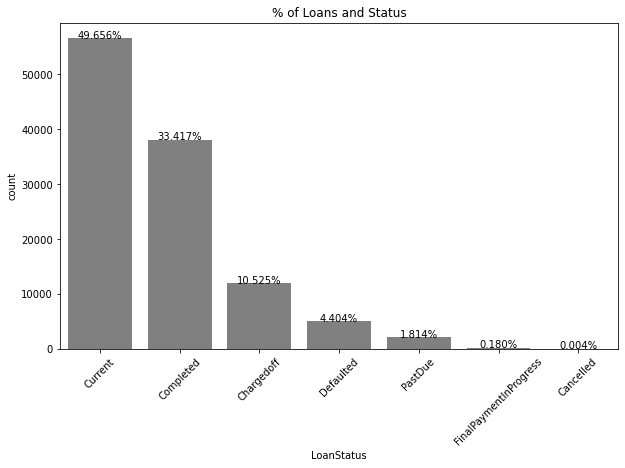

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=loan, x ='LoanStatus', color ='grey', order = loanstatus_count.index)
plt.xticks(rotation=45)

#  Logic to print the proportion text on the bars
for i in range(len(loanstatus_count)):
    count = loanstatus_count[i]
    ptr_str = '{:.3f}%'.format(count*100/loan.shape[0])
    plt.text(i,count,ptr_str, ha = 'center')
plt.title('% of Loans and Status');

About 50% of the loans are currently active and 33% of loans have been completed(that is paid fully). I want to query this data more to know what factors affect a loan status specifically Chargedoff and defaulted loans which both amount to about 16% of loans

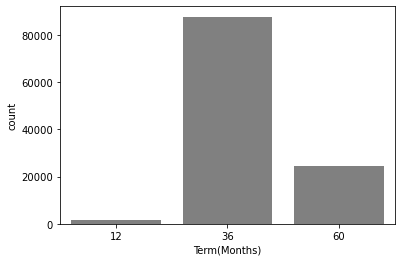

In [15]:
# univariate plot of term
sns.countplot(data=loan, x='Term', color='grey')
plt.xlabel('Term(Months)');

This means loans were spaced between 12 months, 36 months and 60 months periods

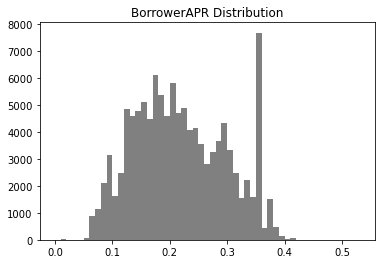

In [16]:
# univariate plot for BorrowerAPR
bin = np.arange(0,loan['BorrowerAPR'].max()+0.02,0.01)
plt.hist(loan['BorrowerAPR'],bins=bin, color = 'grey')
plt.title('BorrowerAPR Distribution');

The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3 and a large spike around 0.36.Additionally, there is a very sharp peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

In [17]:
loan[loan['BorrowerAPR'] > 0.43]

,Term,LoanStatus,BorrowerAPR,LenderYield,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CurrentDelinquencies,TradesNeverDelinquent (percentage),DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
18326,36,Defaulted,0.45857,0.4325,NaN,NaN,NaN,0,NaN,NaN,False,False,NaN,NaN,0.10252,True,10000.000000,3000,153.21
22195,36,Chargedoff,0.46201,0.4325,NaN,NaN,NaN,0,NaN,NaN,False,False,NaN,NaN,0.35430,True,2916.666667,1789,91.37
36018,36,Completed,0.51229,0.4925,NaN,NaN,NaN,0,NaN,NaN,False,False,NaN,NaN,0.02852,True,2838.000000,1500,80.94
56761,36,Defaulted,0.50633,0.4800,NaN,NaN,NaN,0,NaN,NaN,False,False,NaN,NaN,0.03909,False,0.000000,3000,161.88
82043,36,Defaulted,0.48873,0.4750,NaN,NaN,NaN,0,NaN,NaN,False,False,NaN,NaN,0.10021,True,1583.333333,3000,158.66
103973,36,Defaulted,0.45857,0.4325,NaN,NaN,NaN,0,NaN,NaN,False,False,NaN,NaN,0.19413,True,3750.000000,2800,143.00


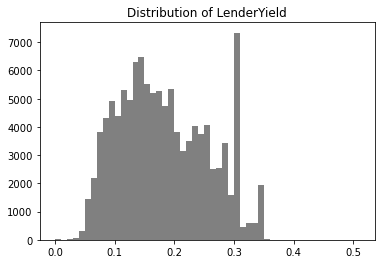

In [18]:
# univariate plot for LenderYield
bin = np.arange(0,loan['LenderYield'].max()+0.02,0.01)
plt.hist(loan['LenderYield'],bins=bin,color = 'grey')
plt.title('Distribution of LenderYield');

The lender yield seems to follow same pattern as Borrower APR. To see this more clearly let's plot both data together

## Issue #3: Change ProsperRating(Alpha) to categorical datatype

In [19]:
loan["ProsperRating (Alpha)"].dtypes

dtype('O')

In [20]:
# convert ProsperRating(Alpha) to ordered categorical datatype
ordinal_rating = {"ProsperRating (Alpha)": ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']}
ordered_var = pd.api.types.CategoricalDtype(categories = ordinal_rating['ProsperRating (Alpha)'],ordered = True)
ordered_var

CategoricalDtype(categories=['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], ordered=True)

In [21]:
loan["ProsperRating (Alpha)"] = loan["ProsperRating (Alpha)"].astype(ordered_var)

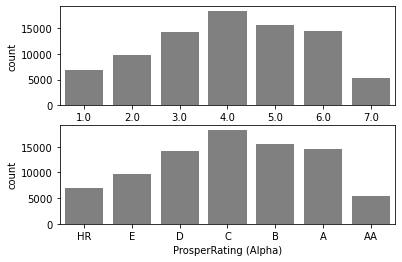

In [22]:
fig,ax = plt.subplots(nrows=2)
sns.countplot(data=loan,x="ProsperRating (numeric)",color='grey',ax=ax[0])
sns.countplot(data=loan,x="ProsperRating (Alpha)",color='grey',ax=ax[1]);
# 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.

We can see that as the rating increases more loans were given up until C ratings where we started to have a decline in number of loans....why this decline?
check if we have lesser people with higher rating apply less often for loans 

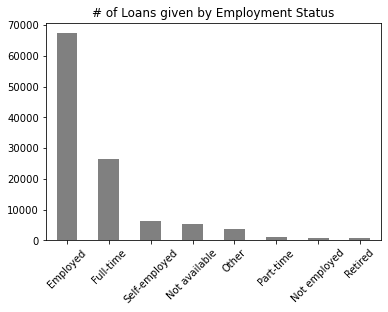

In [23]:
loan.EmploymentStatus.value_counts().plot(kind='bar',color='grey')
plt.xticks(rotation=45)
plt.title('# of Loans given by Employment Status');

Most loans given were given to people who were either employed full-time or self employed, because of this I will create another dataset with just this 3 employment status

In [24]:
employments = ['Employed','Full-time','Self-employed']
loan_employed = loan[loan.EmploymentStatus.isin(employments)==True]
print(loan_employed.EmploymentStatus.unique())
print(loan_employed.shape)

['Self-employed' 'Employed' 'Full-time']
(99811, 19)


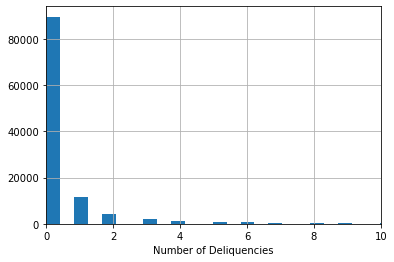

In [25]:
# Distribution of CurrentDeliquencies 
loan["CurrentDelinquencies"].hist(bins=200)
plt.xlim(0,10) # because most data are within this range
plt.xlabel('Number of Deliquencies');

<AxesSubplot:>

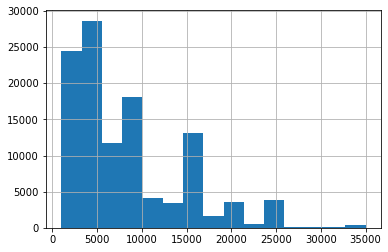

In [26]:
loan['LoanOriginalAmount'].hist(bins=15)

Loans CurrentDelinquencies worth looking into are those between 0 and 4

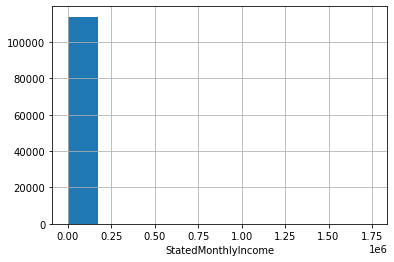

In [27]:
# univariate plot for StatedMonthlyIncome
loan["StatedMonthlyIncome"].hist()
plt.xlabel("StatedMonthlyIncome");

The plot looks highly skewed thus presence of outliers that is extreme monthly incomes

In [28]:
loan["StatedMonthlyIncome"].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

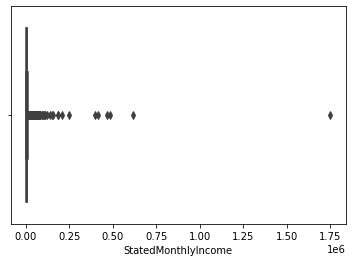

In [29]:
sns.boxplot(data=loan, x="StatedMonthlyIncome");

In [30]:
def impute_outliers_IQR(col):
    
    # function to replace outliers with median value
    q1=col.quantile(0.25)

    q3=col.quantile(0.75)

    IQR=q3-q1

    # max value for loans not in upper outliers
    upper = col[~(col>(q3+1.5*IQR))].max()

    #min values for loans not in lower outliers
    lower = col[~(col<(q1-1.5*IQR))].min()

    col = np.where(col > upper,col.median(),np.where(col < lower,col.median(),col))

    return col

In [31]:
loan.StatedMonthlyIncome = impute_outliers_IQR(loan.StatedMonthlyIncome)

<AxesSubplot:xlabel='StatedMonthlyIncome'>

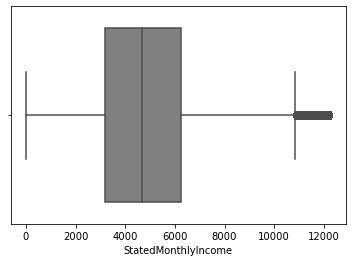

In [32]:
sns.boxplot(data=loan, x="StatedMonthlyIncome", color = 'grey')

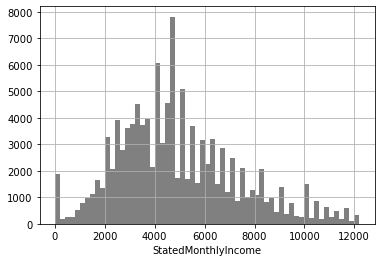

In [33]:
# univariate plot for StatedMonthlyIncome
bin = np.arange(0,loan['StatedMonthlyIncome'].max()+100,200)
loan["StatedMonthlyIncome"].hist(bins=bin, color='grey')
plt.xlabel("StatedMonthlyIncome");

In [34]:
avg = loan['StatedMonthlyIncome'].mean()

In [35]:
# number of loans less than the average stated monthly income
(loan['StatedMonthlyIncome'] < avg).sum() 

65496

In [36]:
# number of loans greater than the average stated monthly income
(loan['StatedMonthlyIncome'] > avg).sum()

48441

The stated monthly income looks more like a normal distribution and we can see that more borrowers earn less than the average salary also the large spike around 4000 and about 5000 shows that those are the range for the average salary of borrowers

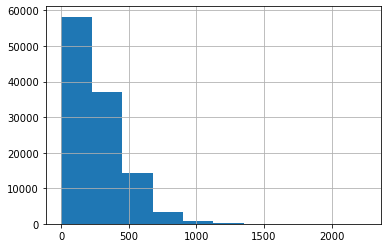

In [37]:
loan["MonthlyLoanPayment"].hist();

In [38]:
loan["MonthlyLoanPayment"].describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

Presence of outliers in the MonthlyLoanPayment column

In [39]:
col = loan["MonthlyLoanPayment"]
q1=col.quantile(0.25)

q3=col.quantile(0.75)

IQR=q3-q1

# max value for loans not in upper outliers
upper = loan["MonthlyLoanPayment"][~(loan["MonthlyLoanPayment"]>(q3+1.5*IQR))].max()

#min values for loans not in lower outliers
lower = loan["MonthlyLoanPayment"][~(loan["MonthlyLoanPayment"]<(q1-1.5*IQR))].min()

outliers = loan[col>upper] 
outliers.shape[0]/len(loan["MonthlyLoanPayment"])

0.030051695235086058

3% of this MonthlyLoanPayment are outliers

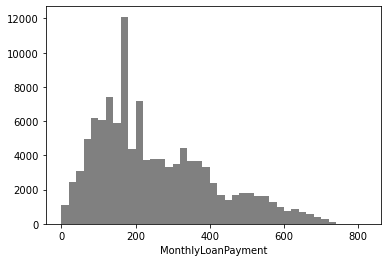

In [40]:
loan.MonthlyLoanPayment = impute_outliers_IQR(loan.MonthlyLoanPayment) # replace loan payment outliers with median
bin = np.arange(0,loan.MonthlyLoanPayment.max()+100,20)
plt.hist(loan.MonthlyLoanPayment,bins=bin, color='grey')
plt.xlabel('MonthlyLoanPayment');

The MonthlyLoanPayment is skewed to the right which means we have more borrowers paying larger payments per month.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> About 50% of the loans are currently active and 33% of loans have been completed(that is paid fully). I want to query this data more to know what factors affect a loan status specifically Chargedoff and defaulted loans which both amount to about 16% of loans

> The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3 and a large spike around 0.36.Additionally, there is a very sharp peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> The lender yield seems to follow same pattern as Borrower APR

> Most borrowers earn less than the average salary and at the same time we have more borrowers making larger payments per month

> Most loans are given to people either employed or self employed

> We have more borrowers earning less than the average ,monthly salary yet we have more borrowers paying larger monthly payment
This needs to be investigated more

## Bivariate Exploration

In [41]:
num_var = ['Term', 'BorrowerAPR', 'LenderYield', 'ProsperRating (numeric)', 'ProsperScore', 'EmploymentStatusDuration',
           'CurrentDelinquencies', 'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio', 'StatedMonthlyIncome',
           'LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'MonthlyLoanPayment',
           'PercentFunded', 'Recommendations', 'Investors']
cat_var = ['ProsperRating', 'ListingCategory',  'EmploymentStatus', 'IncomeRange'
             'IsBorrowerHomeowner', 'CurrentlyInGroup','IncomeVerifiable']

cat_vars1 = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus', 'LoanStatus']

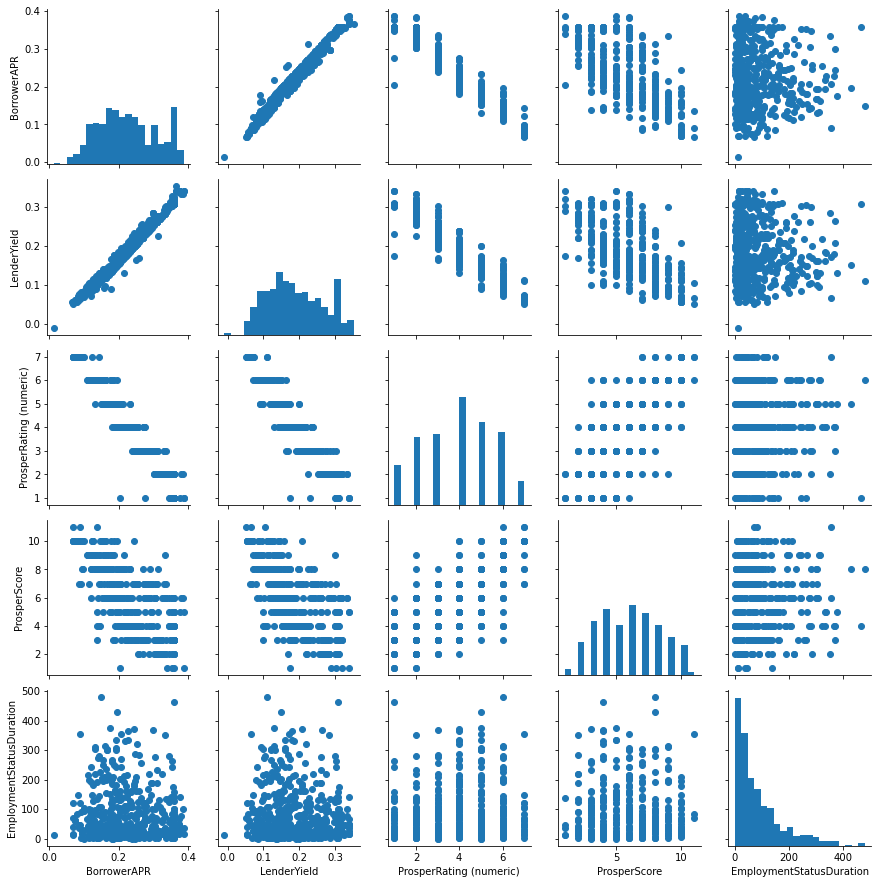

In [42]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
loan_sample = loan.sample(n=500,replace=False)

# used a few columns so as to not get confused
g = sns.PairGrid(data=loan_sample, vars= ['BorrowerAPR', 'LenderYield', 'ProsperRating (numeric)', 
                                          'ProsperScore', 'EmploymentStatusDuration'])
g.map_diag(plt.hist,bins=20)
g.map_offdiag(plt.scatter);

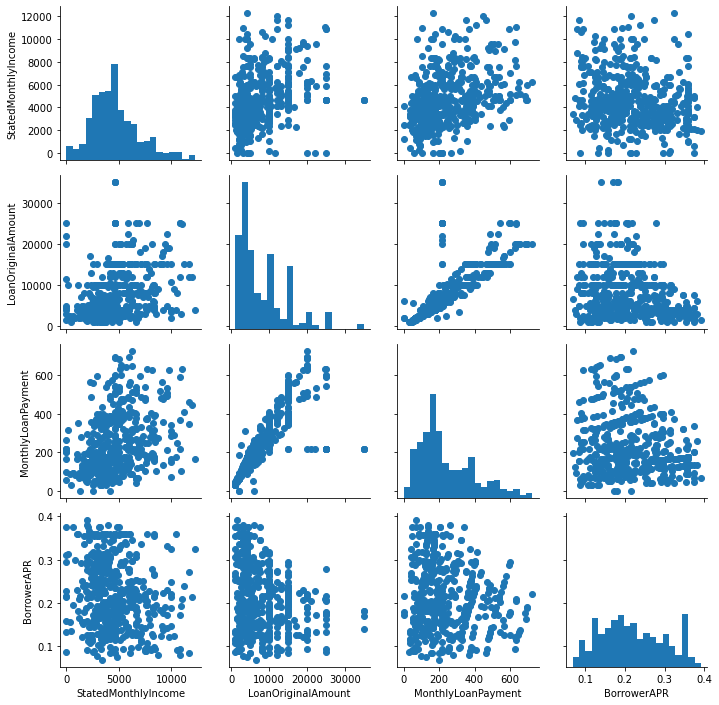

In [43]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
loan_sample = loan.sample(n=500,replace=False)

# using remaining columns
g = sns.PairGrid(data=loan_sample, vars= [ 'StatedMonthlyIncome','LoanOriginalAmount', 'MonthlyLoanPayment','BorrowerAPR'])
g.map_diag(plt.hist,bins=20)
g.map_offdiag(plt.scatter);

- Loan original amount and monthly loan payment
- Borrower APR, Lender Yield
- Prosper score lender yield
- Prosper rating lender yield
- Stated Monthly income monthlyloanpayment

In [44]:
def scatter(x,y):
    '''
    function for creating scatter plots
    '''
    sns.scatterplot(data=loan,x=x,y=y,color='grey')
    plt.title(f'{x} vs {y}')

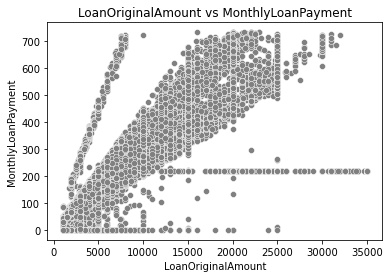

In [45]:
scatter('LoanOriginalAmount','MonthlyLoanPayment')

We can see that generally as the loan original amount increases so also those the monthly loan payment 

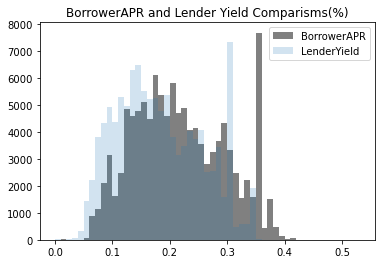

In [46]:
binapr = np.arange(0,loan['BorrowerAPR'].max()+0.02,0.01)
plt.hist(loan['BorrowerAPR'],bins=binapr, color = 'grey',label= 'BorrowerAPR')

bin = np.arange(0,loan['LenderYield'].max()+0.02,0.01)
plt.hist(loan['LenderYield'],bins=bin,alpha=0.2,label='LenderYield')
plt.title('BorrowerAPR and Lender Yield Comparisms(%)')
plt.legend();

This clearly shows that both BorrowerAPR and LenderYield follows same pattern thus meaning that the more a borrower pays for a loan the more the yield of the lender which makes sense in theory.

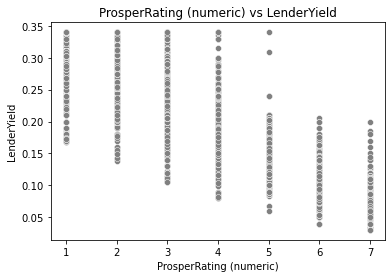

In [47]:
scatter('ProsperRating (numeric)','LenderYield')

<AxesSubplot:xlabel='ProsperRating (numeric)', ylabel='LenderYield'>

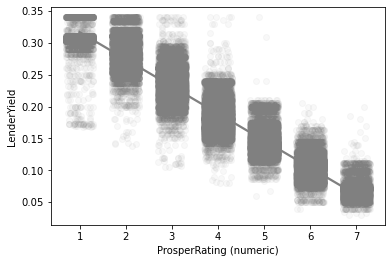

In [48]:
sns.regplot(data=loan,x='ProsperRating (numeric)',y='LenderYield', x_jitter=0.3,scatter_kws={'alpha':1/20},color='grey')

Higher Prosper ratings tend to generate lower LenderYield.

We have roughly a balance amount in the number of home owners and non-home owners

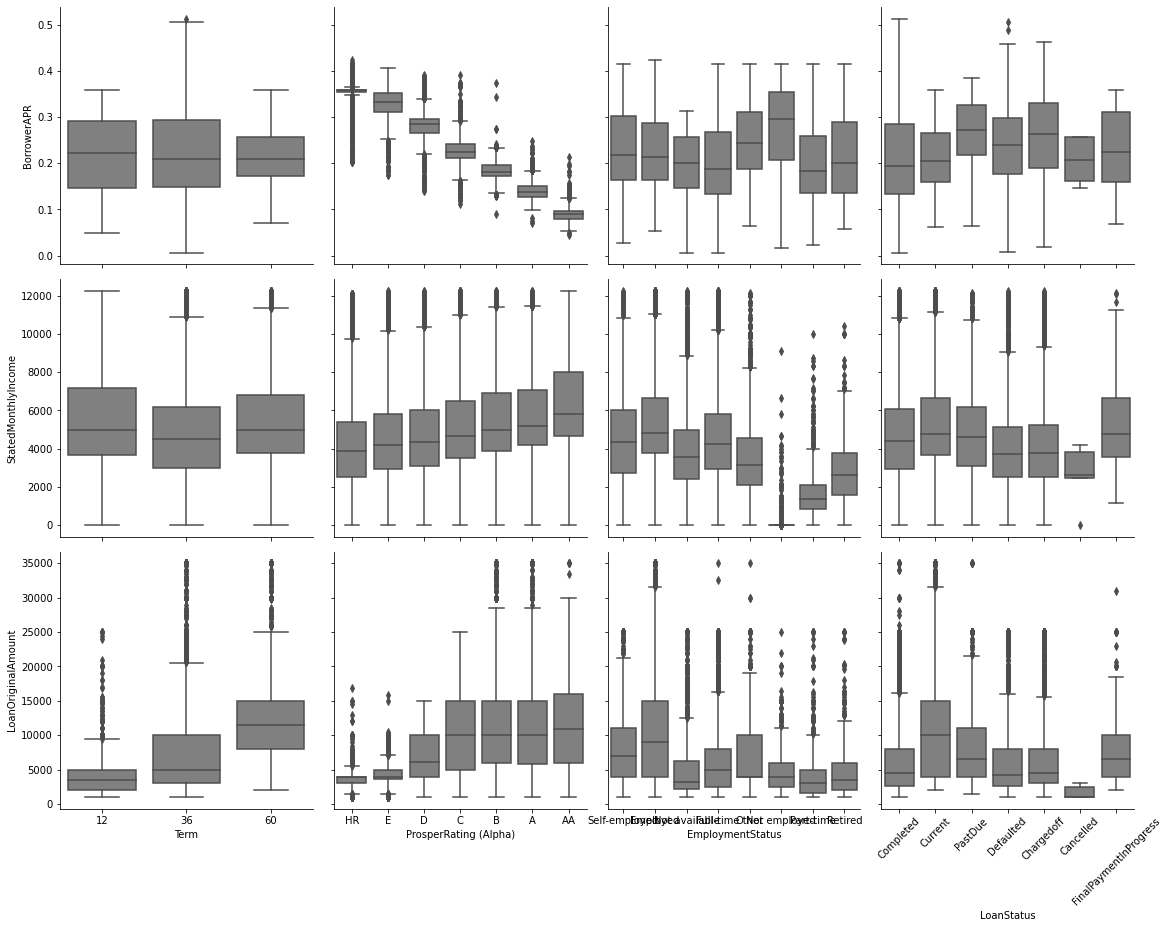

In [57]:
figsize=(15,10)
g = sns.PairGrid(data=loan,x_vars=['Term','ProsperRating (Alpha)', 'EmploymentStatus', 'LoanStatus'],
                y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'],palette={'grey'},
                height=4)
g.map(sns.boxplot)
plt.xticks(rotation=45);

Text(0.5, 1.0, 'Effect of BorrrowerAPR on ProsperRating')

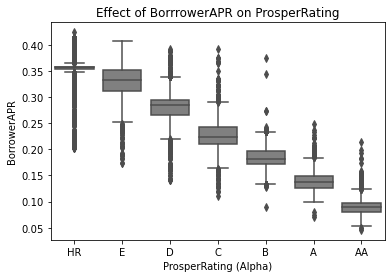

In [72]:
sns.boxplot(data=loan,x='ProsperRating (Alpha)',y='BorrowerAPR',color='grey');
plt.title('Effect of BorrrowerAPR on ProsperRating');

- Larger loans require more time to pay

- The borrower APR decreases with the better rating. 

- Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR. 

- Borrowers with better rating also have larger monthly income and loan amount. 

- The higher the stated monthly income the higher your prosper rating

- Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and non employed borrowers

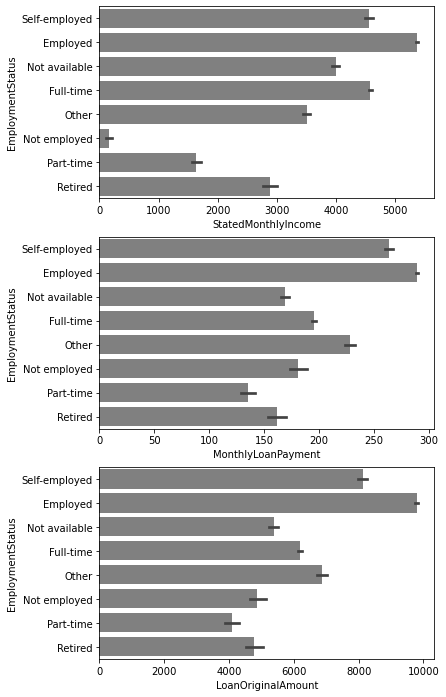

In [58]:
fig,ax = plt.subplots(figsize=(6,12),nrows=3)

sns.barplot(data=loan,y='EmploymentStatus',x='StatedMonthlyIncome',color ='grey',ax=ax[0])

sns.barplot(data=loan,y='EmploymentStatus',x='MonthlyLoanPayment',color ='grey',ax=ax[1]);

sns.barplot(data=loan,y='EmploymentStatus',x='LoanOriginalAmount',color ='grey',ax=ax[2]);

We can see clearly that employed and self employed individuals were given much more loans on average than other categories

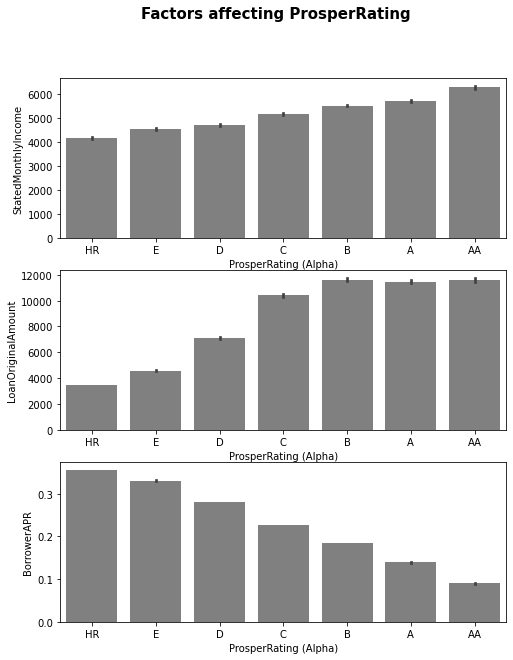

In [59]:
fig,ax = plt.subplots(figsize=(8,10),nrows=3)
sns.barplot(data=loan,x='ProsperRating (Alpha)',y='StatedMonthlyIncome',color ='grey',ax=ax[0])
sns.barplot(data=loan,x='ProsperRating (Alpha)',y='LoanOriginalAmount',color ='grey',ax=ax[1])
sns.barplot(data=loan,x='ProsperRating (Alpha)',y='BorrowerAPR',color ='grey',ax=ax[2])

plt.suptitle('Factors affecting ProsperRating',size=15,fontweight="bold");

Now we can see that as the stated monthly income increases so also thos the prosper rating which in turn increases the loan given

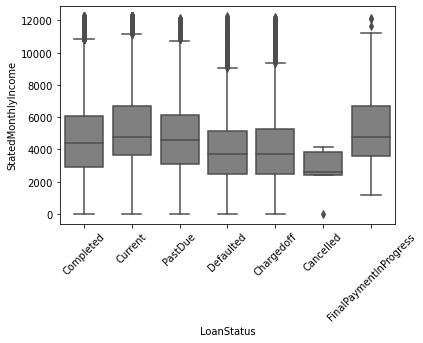

In [60]:
sns.boxplot(data=loan,x='LoanStatus',y='StatedMonthlyIncome',color='grey')
plt.xticks(rotation=45);

- Completed loans has an average monthly salary of $4000
- Cancelled loans were by borrowers with extremly low incomes
- Defaulted and charged off loans have extreme values that is very large incomes this  needs to be looked into more. Why are people with high incomes defaulting their loans or have them been charged off.

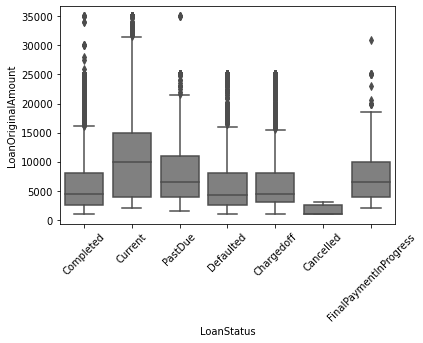

In [61]:
sns.boxplot(data=loan,x='LoanStatus',y='LoanOriginalAmount',color='grey')
plt.xticks(rotation=45);

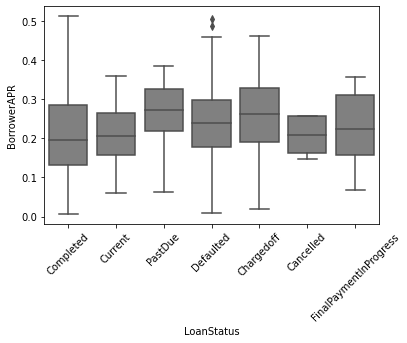

In [62]:
sns.boxplot(data=loan,x='LoanStatus',y='BorrowerAPR',color='grey')
plt.xticks(rotation=45);

Loans with large borrowerAPR are most likely going to end up being defaulted or chargedoff 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
A lot of insights were drawn from my Bivariate visualizations such as:

1. The borrower APR is negatively associated with the ProsperRating , which mean the higher the ProsperRating, the lower the APR. It also shows that the BorrowerAPR and LenderYield follows the same pattern. This means that the more a borrowers pays on a loan the more the lender gains. 

2. Loans with high original loan amount were positively corrrelated with StatedMonthly Income and ProsperRating, this implies that people who earned more could borrow more than others and generally have greater ProsperRating. Also, the higher the LoanOriginalAmount the larger the monthly loan payment

3. Defaulted and charged off loans have extreme values that is very large incomes this needs to be looked into more. Why are people with high incomes defaulting their loans or have them been charged off.

4. Loans with large borrowerAPR are most likely going to end up being defaulted or chargedoff

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
 It also shows that borrowers with better rating also have larger monthly income and loan amount. There is a interaction between prosper rating and term. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers. 

# Multivariate Exploration

The main things I want to explore in this part of the analysis are:

1. What numerical variables affect the prosper ratings of loans
2. What is the major factor that affects the final outcome of a loan

For stated monthly income, it doesn't seem like there is a interaction effect between term and rating, the pattern of term is similar among different ratings. But for loan amount, there is a interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

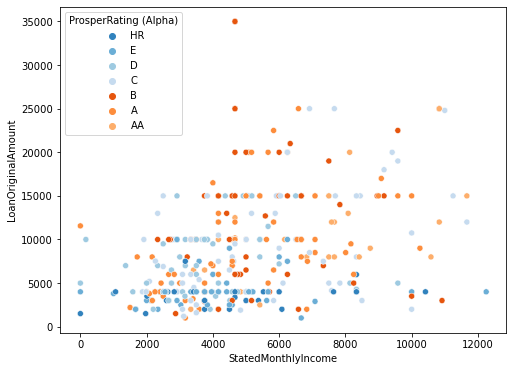

In [63]:
fig = plt.figure(figsize = [8,6])
sns.scatterplot(data=loan_sample,x='StatedMonthlyIncome',y='LoanOriginalAmount',hue='ProsperRating (Alpha)',
               palette='tab20c');

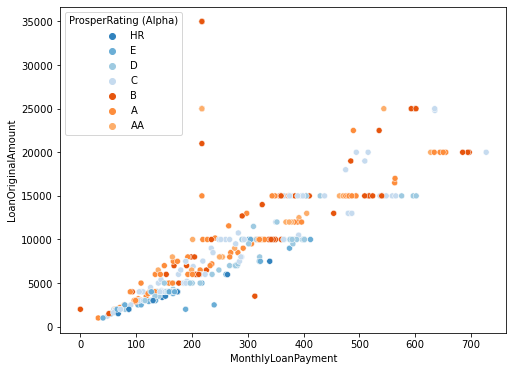

In [64]:
fig = plt.figure(figsize = [8,6])
sns.scatterplot(data=loan_sample,x='MonthlyLoanPayment',y='LoanOriginalAmount',hue='ProsperRating (Alpha)',
               palette='tab20c');

From the visual above we see that lower ratings like HR,E,D and C are mainly at the bottom left which means low ratings are given to people with low monthly income and lower loans.

Also, higher ratings were given to people with high monthly income and loans as shown by the top right side of the graph

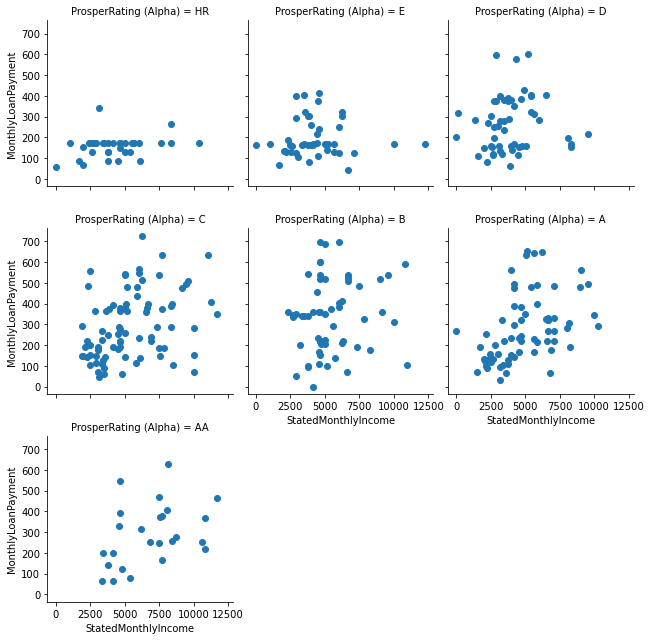

In [65]:
g = sns.FacetGrid(data = loan_sample, col = 'ProsperRating (Alpha)', col_wrap=3)
g.map(plt.scatter, 'StatedMonthlyIncome', 'MonthlyLoanPayment');

As the rating increases the linearity between StatedMonthlyIncome and MonthlyLoanPayment becomes more glaring

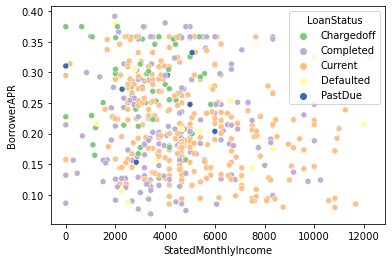

In [66]:
sns.scatterplot(data=loan_sample,x='StatedMonthlyIncome',y='BorrowerAPR',hue='LoanStatus',
               palette='Accent');

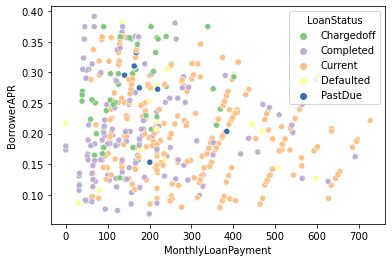

In [67]:
sns.scatterplot(data=loan_sample,x='MonthlyLoanPayment',y='BorrowerAPR',hue='LoanStatus',
               palette='Accent');

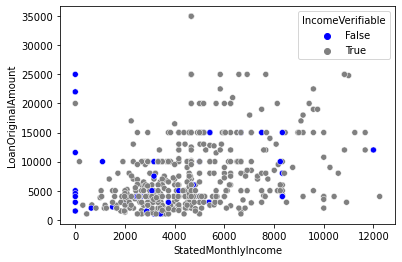

In [68]:
sns.scatterplot(data=loan_sample,x='StatedMonthlyIncome',y='LoanOriginalAmount',hue='IncomeVerifiable',palette=(['blue','grey']));

Generally, loans with unverifiable income seems to have very low stated income 

<AxesSubplot:xlabel='LoanStatus', ylabel='LoanOriginalAmount'>

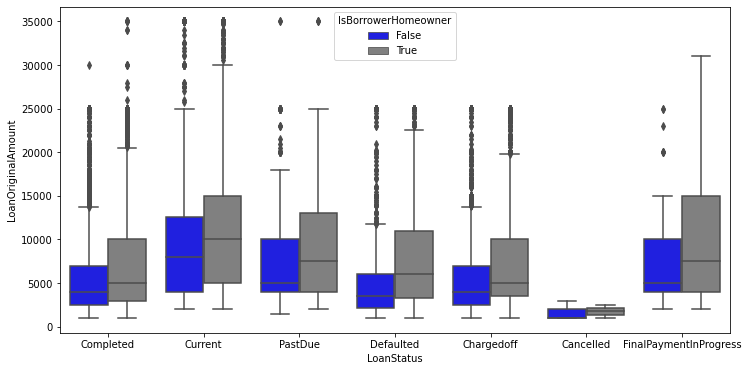

In [69]:
plt.figure(figsize=(12,6))
sns.boxplot(x='LoanStatus',y='LoanOriginalAmount',data=loan,hue='IsBorrowerHomeowner',
           palette=(['blue','grey']))

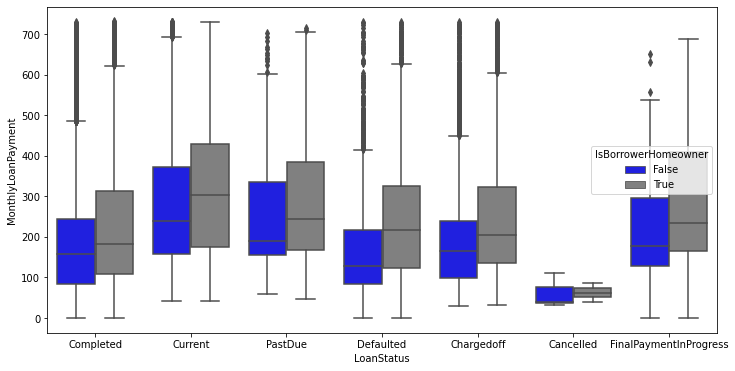

In [70]:
plt.figure(figsize=(12,6))
sns.boxplot(x='LoanStatus',y='MonthlyLoanPayment',data=loan,hue='IsBorrowerHomeowner',
           palette=(['blue','grey']));

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There is a positive linear relationship between prosper rating and monthly loan payment which is seen clearly at the highest rating


# Were there any interesting or surprising interactions between features?


1. The higher the loans you collect the more your ratings increases



2. Generally, loans with unverifiable income amount seems to have very low stated income.  This could be because they have no source of income at all or their source of income isn't reliable but we don't have enough data to query more.

## Conclusion

The prosper loan dataset is highly inter related but the relations that stood out are:
- The BorrowerAPR is negatively correlated with the prosper rating, the BorrowerAPR also follows the same trend as the LenderYield

- The prosperRating is strongly affected by the BorrowerAPR, stated monthly income and loan original amount

- Borrowers with low income have their loans chargedoff or they default them.
